In [1]:
%load_ext autoreload
%autoreload 2

import funcoes as f
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import yfinance as yf
from pandas_datareader import data as pdr
f.now

'2022-10-31 Monday 14:02:09'

In [2]:
strat = f.acceleratingDualMomentum(interval='1MO', momentum='weighted') ## weighted / simple / og
benchmark = f.get60_40()

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed


In [3]:
bm_stats = f.stats(benchmark[['Cumulative Returns']])
bm_stats.append(len(benchmark['ret'].loc[benchmark['ret']>0]) / len(benchmark['ret'])*100)
BMStats  = pd.DataFrame(bm_stats,columns=['60/40'],
                                  index=['CAGR','STD','Sharpe','maxDD','Sortino','Positive Periods(%)'])
strat_stats = f.stats(strat[['Cumulative Returns']])
strat_stats.append(len(strat['ret'].loc[strat['ret']>0]) / len(strat['ret'])*100)

CompareStats  = pd.DataFrame(strat_stats,columns=['Dual Momentum'],
                                  index=['CAGR','STD','Sharpe','maxDD','Sortino','Positive Periods(%)'])
CompareStats.join(BMStats)

,Dual Momentum,60/40
CAGR,12.745877,4.935456
STD,0.078138,0.092925
Sharpe,1.497683,0.418845
maxDD,-12.018031,-36.012120
Sortino,2.297365,0.476946
Positive Periods(%),76.744186,63.888889


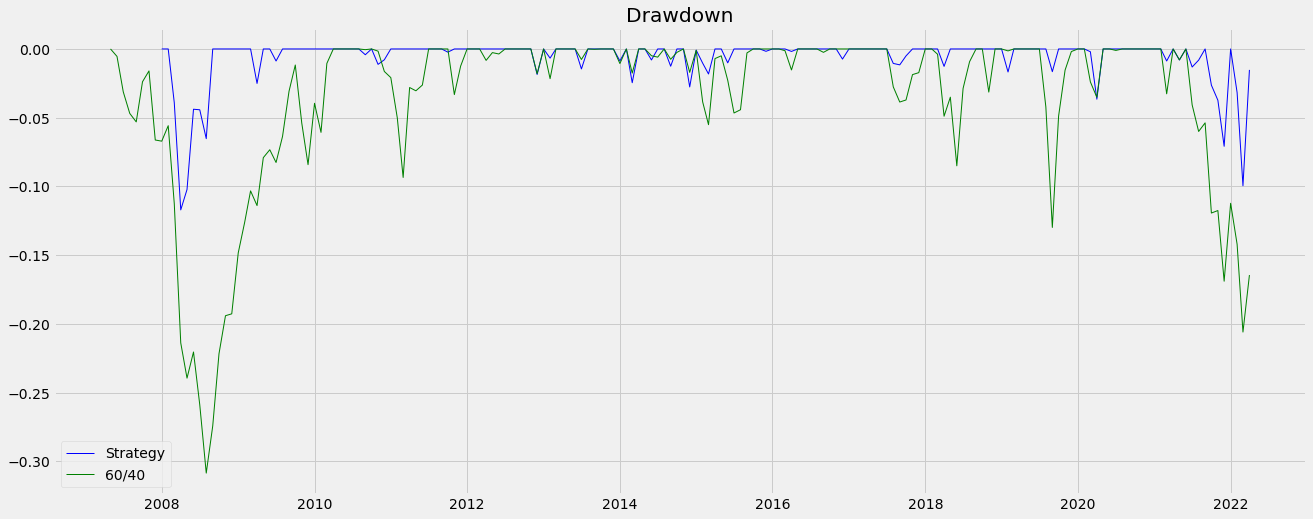

In [4]:
plt.figure(figsize=(20,8))
plt.plot(f.drawdown_DF(strat)['Date'], f.drawdown_DF(strat)['drawdowns'], linewidth=1, color='b', label='Strategy')
plt.plot(f.drawdown_DF(benchmark)['Date'], f.drawdown_DF(benchmark)['drawdowns'], linewidth=1, color='g', label='60/40')
plt.title("Drawdown")
plt.legend()
plt.show;

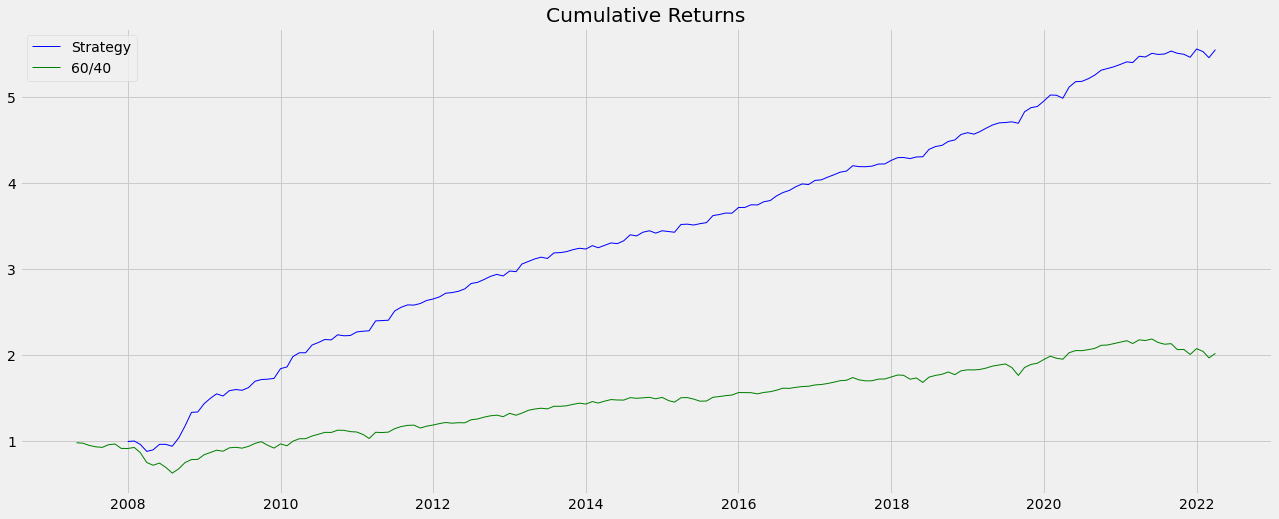

In [5]:
plt.figure(figsize=(20,8))
plt.plot(strat['date'], strat['Cumulative Returns'], linewidth=1, color='b', label='Strategy')
plt.plot(benchmark['date'], benchmark['Cumulative Returns'], linewidth=1, color='g', label='60/40')
plt.title("Cumulative Returns")
plt.legend()
plt.show;

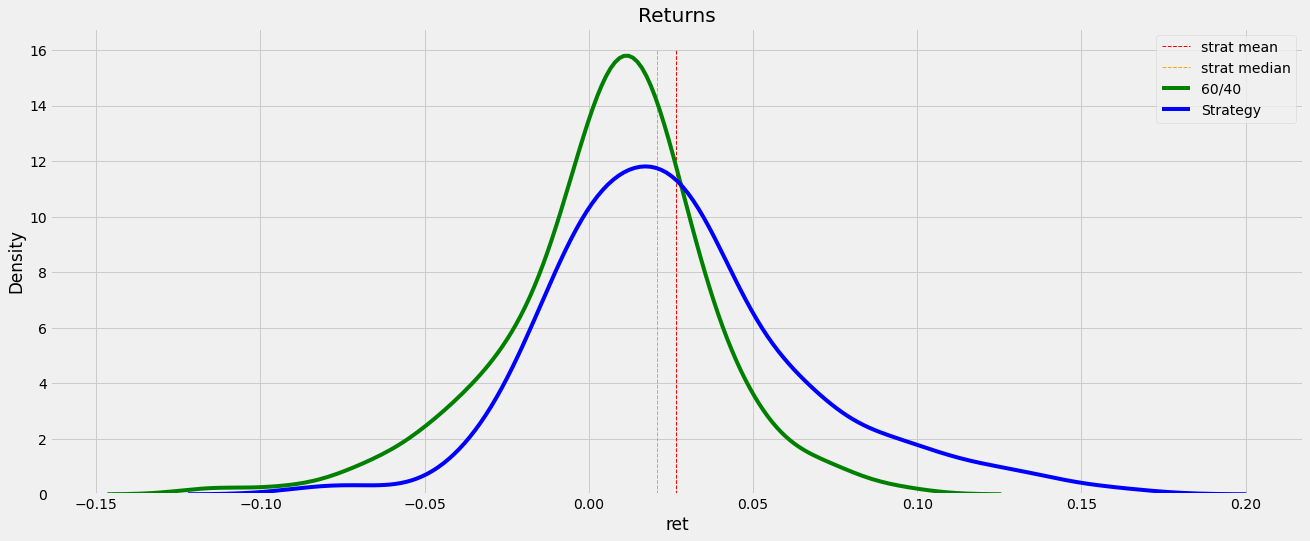

In [6]:
plt.figure(figsize=(20,8))
plt.vlines(strat['ret'].mean(), 0, 16, color='r', linestyle='dashed', linewidth=1,label='strat mean')
plt.vlines(strat['ret'].median(), 0, 16, color='orange', linestyle='dashed', linewidth=1, label='strat median')
sns.distplot(benchmark['ret'], hist=False, bins=int(len(strat['ret'])/2), color='g', label='60/40')
sns.distplot(strat['ret'], hist=False, bins=int(len(strat['ret'])/2), color='b', label='Strategy')
plt.title("Returns")
plt.legend()
plt.show;

In [7]:
# POSITIVE SKEW = MEAN HIGHER THAN MEDIAN 
f.skewness(strat['ret'])

0.7304403065469278

In [8]:
# KURTOSIS HIGHER THAN 3 = FAT TAIL DISTRIBUTION
f.kurtosis(strat['ret'])

4.167396641415908

In [9]:
f.compound(strat['ret'])

78.61301738082042

In [10]:
f.annualize_vol(strat['ret'],12)

0.1325298182917466

In [11]:
f.annualize_rets(strat['ret'], 12)

0.3571467048864063

In [12]:
rfr = f.riskFreeRate()
f.sharpe_ratio(strat['ret'], rfr, 12)

2.591589883592252

In [13]:
f.is_normal(strat['ret'], 0.01)

False

In [14]:
dd_strat = f.drawdown_DF(strat)
dd_bm = f.drawdown_DF(benchmark[-len(strat):])
dd_strat.tail(10)

,Date,wealth_index,previous_peaks,drawdowns
162,2021-07-01 00:00:00-04:00,76304.923854,77320.960864,-0.013141
163,2021-08-01 00:00:00-04:00,76690.853435,77320.960864,-0.008149
164,2021-09-01 00:00:00-04:00,79327.254124,79327.254124,0.000000
165,2021-10-01 00:00:00-04:00,77237.496075,79327.254124,-0.026344
166,2021-11-01 00:00:00-04:00,76367.867243,79327.254124,-0.037306
167,2021-12-01 00:00:00-05:00,73709.319936,79327.254124,-0.070820
168,2022-01-01 00:00:00-05:00,80844.748018,80844.748018,0.000000
169,2022-02-01 00:00:00-05:00,78279.038636,80844.748018,-0.031736
170,2022-03-01 00:00:00-05:00,72797.912257,80844.748018,-0.099534
171,2022-04-01 00:00:00-04:00,79613.017381,80844.748018,-0.015236


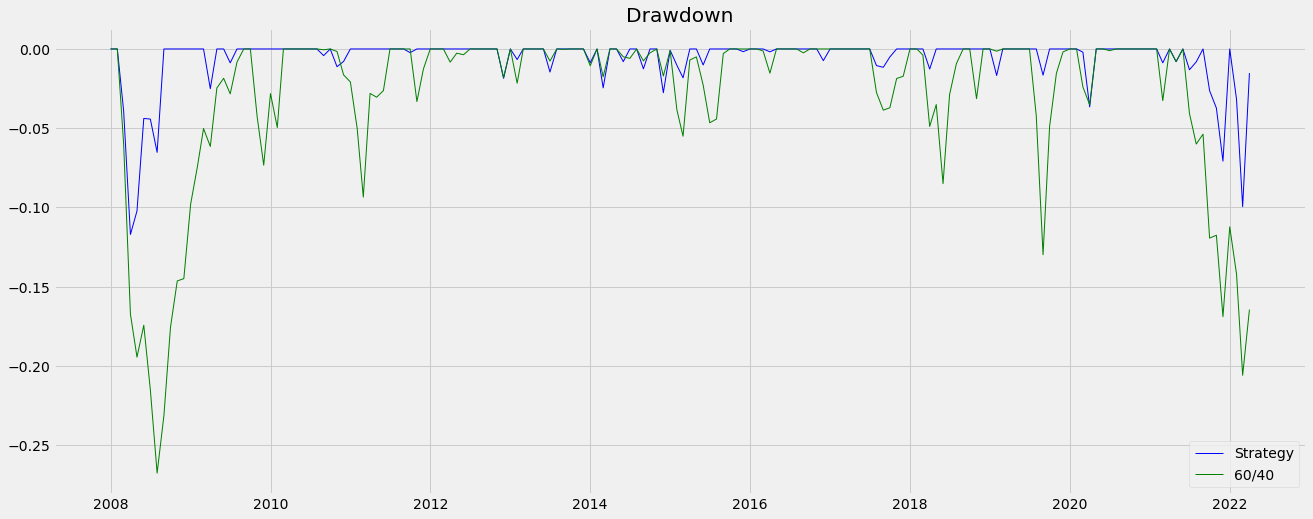

In [15]:
plt.figure(figsize=(20,8))
plt.plot(dd_strat['Date'], dd_strat['drawdowns'], linewidth=1, color='b', label='Strategy')
plt.plot(dd_bm['Date'], dd_bm['drawdowns'], linewidth=1, color='g', label='60/40')
plt.title("Drawdown")
plt.legend()
plt.show;

In [16]:
f.semideviation(strat['ret'])

0.016991976499631353

In [17]:
# Returns the historic Value at Risk at a specified level
# i.e. returns the number such that "level" percent of the returns
# fall below that number, and the (100-level) percent are above
f.var_historic(strat['ret'])*100

2.479764567505104

In [18]:
f.cvar_historic(strat['ret'])*100

4.116255925687373

In [19]:
f.var_gaussian(strat['ret'])*100

3.627270801354977